In [29]:
# data analysis and wrangling/ visualization/machine learning
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
df = pd.read_csv('fragandlead-forML.csv')

In [31]:
#drop unwanted columns associated with lead-likeness 
df = df.drop(['Plane of best fit', 'Aliphatic rings', 'tPSA', 'Carbon sp3 fraction','PMI x (I1)', 'PMI y (I2)', 'Lipinski rule-of-5 failures', 'Heteroatoms', 'Chiral centres', 'Rotatable bonds','Murcko framework', 'Murcko framework with alpha atoms',  'Canonical SMILES','Type','Molecule ID','Parent molecule 1 ID', 'Parent molecule 1 canonical SMILES', 'Parent molecule 2 ID', 'Parent molecule 2 canonical SMILES', 'Product of reaction' ], axis=1)
df.head() 

,RMM,AlogP,Lead-likeness penalty,Heavy atoms,Aromatic rings
0,354.440,0.09,0,24,1
1,299.361,0.30,0,20,1
2,367.435,0.86,1,25,1
3,371.424,0.27,1,25,1
4,425.497,1.28,3,28,2


In [32]:
for x in df:
    df['Lead-likeness penalty'] = df['Lead-likeness penalty'].replace([2, 3, 4, 5, 6, 7, 8, 9, 10], 1)

In [33]:
df.head()

,RMM,AlogP,Lead-likeness penalty,Heavy atoms,Aromatic rings
0,354.440,0.09,0,24,1
1,299.361,0.30,0,20,1
2,367.435,0.86,1,25,1
3,371.424,0.27,1,25,1
4,425.497,1.28,1,28,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 5 columns):
RMM                      1812 non-null float64
AlogP                    1812 non-null float64
Lead-likeness penalty    1812 non-null int64
Heavy atoms              1812 non-null int64
Aromatic rings           1812 non-null int64
dtypes: float64(2), int64(3)
memory usage: 70.9 KB


In [35]:
df = df.drop(['RMM' ], axis=1)
df.head(20) 

,AlogP,Lead-likeness penalty,Heavy atoms,Aromatic rings
0,0.09,0,24,1
1,0.30,0,20,1
2,0.86,1,25,1
3,0.27,1,25,1
4,1.28,1,28,2
5,1.38,1,27,2
6,1.95,1,26,2
7,1.98,1,25,1
8,2.01,1,30,2
9,0.99,1,29,2


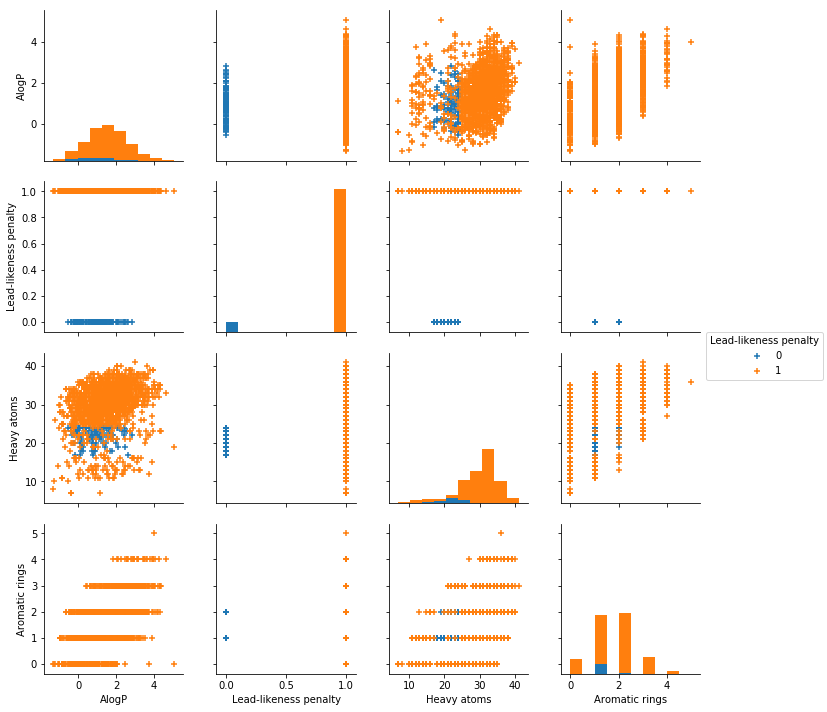

In [36]:
pairplot = sns.pairplot(df, hue='Lead-likeness penalty', markers='+')
plt.show()

In [37]:
#change astype of both to int so can be in the correct format 
df['AlogP'] = df['AlogP'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 4 columns):
AlogP                    1812 non-null int64
Lead-likeness penalty    1812 non-null int64
Heavy atoms              1812 non-null int64
Aromatic rings           1812 non-null int64
dtypes: int64(4)
memory usage: 56.7 KB


In [38]:
#pick X and Y for modeling
X = df.drop(['Lead-likeness penalty'], axis=1)
y = df['Lead-likeness penalty']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(1812, 3)
(1812,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1268, 3)
(1268,)
(544, 3)
(544,)


In [40]:
X.head()

,AlogP,Heavy atoms,Aromatic rings
0,0,24,1
1,0,20,1
2,0,25,1
3,0,25,1
4,1,28,2


In [41]:
#Logistic Regression#Logistic 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_train, y_train)
acc_log

0.9227129337539433

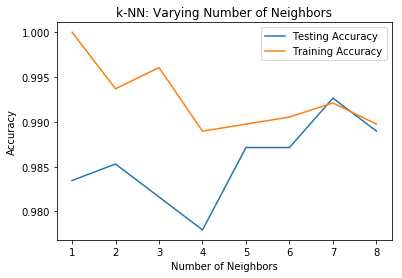

In [42]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [43]:
#KNN for n=3#KNN for  
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, y_train)
acc_knn

0.9897476340694006

In [44]:
# Support Vector Machines# Suppor 
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, y_train)
acc_svc

0.998422712933754

In [45]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_train, y_train)
acc_gaussian

0.9787066246056783

In [46]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = perceptron.score(X_train, y_train)
acc_perceptron

/Users/bobbylowe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9337539432176656

In [47]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = linear_svc.score(X_train, y_train)
acc_linear_svc

0.9337539432176656

In [48]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = sgd.score(X_train, y_train)
acc_sgd

/Users/bobbylowe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.8690851735015773

In [49]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, y_train)
acc_decision_tree

1.0

In [55]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = random_forest.score(X_train, y_train)
acc_random_forest

1.0

In [51]:
#model evaluation
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,1.000000
8,Decision Tree,1.000000
0,Support Vector Machines,0.998423
1,KNN,0.989748
4,Naive Bayes,0.978707
5,Perceptron,0.933754
7,Linear SVC,0.933754
2,Logistic Regression,0.922713
6,Stochastic Gradient Decent,0.869085


In [52]:
# make a prediction for an example of an out-of-sample observation
#AlogP	Heavy atoms(HAC)	Aromatic rings(NAr)
decision_tree.predict([[1, 15, 1]])

array([1])

In [53]:
# make a prediction for an example of an out-of-sample observation
#AlogP	Heavy atoms(HAC)	Aromatic rings(NAr)
def lead(AlogP, HAC, NAr):
    
    x = gaussian.predict([[AlogP, HAC, NAr]])
    if x == array([1]):
        print('The suggested compound is NOT "lead-like" ')
    else:
        print('The suggested compound is "lead-like" ')

In [54]:
X.head()

,AlogP,Heavy atoms,Aromatic rings
0,0,24,1
1,0,20,1
2,0,25,1
3,0,25,1
4,1,28,2
